# EDA

Elegimos la base de datos de **Adult Income (Census Income)** porque se ajusta a nuestro nivel de conocimiento y a las herramientas que dominamos. A diferencia de conjuntos más complejos, como los de visión por computadora o procesamiento de lenguaje natural, esta base combina variables demográficas y laborales que son más fáciles de interpretar y manipular. Esto nos permite aplicar con seguridad técnicas de análisis exploratorio, clasificación y evaluación de sesgos, obteniendo resultados significativos y útiles sin necesidad de recurrir a metodologías demasiado especializadas.

## Importar Librerias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar el conjunto de datos
### Se carga el archivo CSV y se reemplazan los '?' por valores nulos (NaN) para su posterior tratamiento.
### Esto es un paso crucial en la limpieza de datos, ya que los '?' no son reconocidos como valores faltantes por defecto.

In [26]:
df_ingresos = pd.read_csv('./income/adult.csv', na_values=' ?')
df_ingresos.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Renombramiento de columnas a español

In [27]:
nombre_columnas = {
  'age': 'edad',
  'workclass': 'clase_de_trabajo',
  'fnlwgt': 'peso_final',
  'education': 'educacion',
  'education.num': 'num_educacion',
  'marital.status': 'estado_civil',
  'occupation': 'ocupacion',
  'relationship': 'relacion',
  'race': 'raza',
  'sex': 'sexo',
  'capital.gain': 'ganancia_capital',
  'capital.loss': 'perdidas_capital',
  'hours.per.week': 'horas_por_semana',
  'native.country': 'pais_natal',
  'income': 'ingreso',
}
df_ingresos.rename(columns=nombre_columnas, inplace=True)
df_ingresos.columns

Index(['edad', 'clase_de_trabajo', 'peso_final', 'educacion', 'num_educacion',
       'estado_civil', 'ocupacion', 'relacion', 'raza', 'sexo',
       'ganancia_capital', 'perdidas_capital', 'horas_por_semana',
       'pais_natal', 'ingreso'],
      dtype='object')

### Dimensionamiento del dataSet

In [28]:
df_ingresos.shape

(32561, 15)

In [29]:
df_ingresos.describe()

,edad,peso_final,num_educacion,ganancia_capital,perdidas_capital,horas_por_semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Verificamos los valores únicos en las columnas categóricas

In [30]:
columnas_categoricas = df_ingresos.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
  print(f"\nColumna {col}: {df_ingresos[col].nunique()} valores únicos")


Columna clase_de_trabajo: 9 valores únicos

Columna educacion: 16 valores únicos

Columna estado_civil: 7 valores únicos

Columna ocupacion: 15 valores únicos

Columna relacion: 6 valores únicos

Columna raza: 5 valores únicos

Columna sexo: 2 valores únicos

Columna pais_natal: 42 valores únicos

Columna ingreso: 2 valores únicos


### Ahora los valores numéricos

In [31]:
columnas_numericas = df_ingresos.select_dtypes(include=['int64', 'float64']).columns

for col in columnas_numericas:
  print(f"\nColumna {col}: {df_ingresos[col].nunique()} valores únicos")


Columna edad: 73 valores únicos

Columna peso_final: 21648 valores únicos

Columna num_educacion: 16 valores únicos

Columna ganancia_capital: 119 valores únicos

Columna perdidas_capital: 92 valores únicos

Columna horas_por_semana: 94 valores únicos


### Variables con datos ausentes

Evidenciamos la lectura correcta de los datos, rapidamente se pueden identificar valores '?' el creador de la base de datos decidio marcar valores faltantes con este valor. Los remplazamos por nan para ser reconocidos facilmente.

In [32]:
df_ingresos.replace('?', np.nan, inplace=True)

# Revisamos los tipos de datos
df_ingresos.dtypes

edad                 int64
clase_de_trabajo    object
peso_final           int64
educacion           object
num_educacion        int64
estado_civil        object
ocupacion           object
relacion            object
raza                object
sexo                object
ganancia_capital     int64
perdidas_capital     int64
horas_por_semana     int64
pais_natal          object
ingreso             object
dtype: object

### Validamos el porcentaje de valores nulos

In [33]:
porcentaje_nulos = df_ingresos.isnull().mean() * 100
porcentaje_nulos

edad                0.000000
clase_de_trabajo    5.638647
peso_final          0.000000
educacion           0.000000
num_educacion       0.000000
estado_civil        0.000000
ocupacion           5.660146
relacion            0.000000
raza                0.000000
sexo                0.000000
ganancia_capital    0.000000
perdidas_capital    0.000000
horas_por_semana    0.000000
pais_natal          1.790486
ingreso             0.000000
dtype: float64

In [34]:
# Verificamos los valores nulos en cada columna
df_ingresos.isnull().sum()

edad                   0
clase_de_trabajo    1836
peso_final             0
educacion              0
num_educacion          0
estado_civil           0
ocupacion           1843
relacion               0
raza                   0
sexo                   0
ganancia_capital       0
perdidas_capital       0
horas_por_semana       0
pais_natal           583
ingreso                0
dtype: int64

Se identifican valores nulos en las columnas categóricas. Procedemos a eliminarlos para simplificar el análisis.

In [35]:
# Imputar valores nulos en columnas categóricas con la moda
for col in columnas_categoricas:
  moda = df_ingresos[col].mode()[0]
  df_ingresos[col] = df_ingresos[col].fillna(moda)

print("DF después de imputar valores nulos con la moda:", df_ingresos.shape)
print("Tipos de datos de las columnas:")
print(df_ingresos.dtypes)

DF después de imputar valores nulos con la moda: (32561, 15)
Tipos de datos de las columnas:
edad                 int64
clase_de_trabajo    object
peso_final           int64
educacion           object
num_educacion        int64
estado_civil        object
ocupacion           object
relacion            object
raza                object
sexo                object
ganancia_capital     int64
perdidas_capital     int64
horas_por_semana     int64
pais_natal          object
ingreso             object
dtype: object


In [36]:
df_ingresos.describe()

,edad,peso_final,num_educacion,ganancia_capital,perdidas_capital,horas_por_semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Transformar columnas a clases (sexo, ingreso)

In [37]:
df_ingresos["sexo"] = df_ingresos["sexo"].apply(lambda x: 1 if x == "Male" else 0)
df_ingresos["ingreso"] = df_ingresos["ingreso"].apply(lambda x: 1 if x == ">50K" else 0)

df_ingresos.head()

,edad,clase_de_trabajo,peso_final,educacion,num_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia_capital,perdidas_capital,horas_por_semana,pais_natal,ingreso
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


### Columna de continente

In [38]:
# Diccionario de agrupación de países por continente
continente_agrupacion = {
  'Asia': ['Vietnam', 'China', 'Japón', 'Japan', 'India', 'Iran', 'Philippines', 'Hong', 'Laos', 'Taiwan', 'Thailand', 'Cambodia'],
  'Europa': ['Alemania', 'Germany', 'Francia', 'France', 'Reino Unido', 'England', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Scotland', 'Yugoslavia', 'Holand-Netherlands'],
  'América': ['United-States', 'Canada', 'Mexico', 'México', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Puerto-Rico', 'Trinadad&Tobago', 'Columbia', 'South'],
  'África': ['Sudáfrica', 'South Africa', 'Nigeria', 'Egipto', 'Egypt'],
  'Oceanía': ['Australia', 'Nueva Zelanda', 'New Zealand']
}

# Crear un diccionario inverso para mapear país a continente
pais_a_continente = {}
for continente, paises in continente_agrupacion.items():
  for pais in paises:
    pais_a_continente[pais] = continente

# Mapear los países del dataset a su continente
df_ingresos['continente'] = df_ingresos['pais_natal'].map(pais_a_continente)
df_ingresos['continente'].value_counts(dropna=False)

continente
América    31369
Asia         671
Europa       521
Name: count, dtype: int64

In [39]:
columnas_categoricas = df_ingresos.select_dtypes(include=['object']).columns

for col in columnas_categoricas:
  print(f"\nColumna {col}: {df_ingresos[col].nunique()} valores únicos")


Columna clase_de_trabajo: 8 valores únicos

Columna educacion: 16 valores únicos

Columna estado_civil: 7 valores únicos

Columna ocupacion: 14 valores únicos

Columna relacion: 6 valores únicos

Columna raza: 5 valores únicos

Columna pais_natal: 41 valores únicos

Columna continente: 3 valores únicos


### Creacion de indicadores

Creamos una nueva categoria age group basada en rangos de edad para ayudar en el análisis

In [40]:
df_ingresos['grupo_edad'] = pd.cut(df_ingresos['edad'], bins=[16, 25, 40, 60, 90], labels=['Joven', 'Adulto', 'Mediana Edad', 'Tercera Edad'])
df_ingresos["grupo_edad"].values

['Tercera Edad', 'Tercera Edad', 'Tercera Edad', 'Mediana Edad', 'Mediana Edad', ..., 'Joven', 'Adulto', 'Adulto', 'Mediana Edad', 'Joven']
Length: 32561
Categories (4, object): ['Joven' < 'Adulto' < 'Mediana Edad' < 'Tercera Edad']

## Análisis univariado

### Detección de valores atípicos

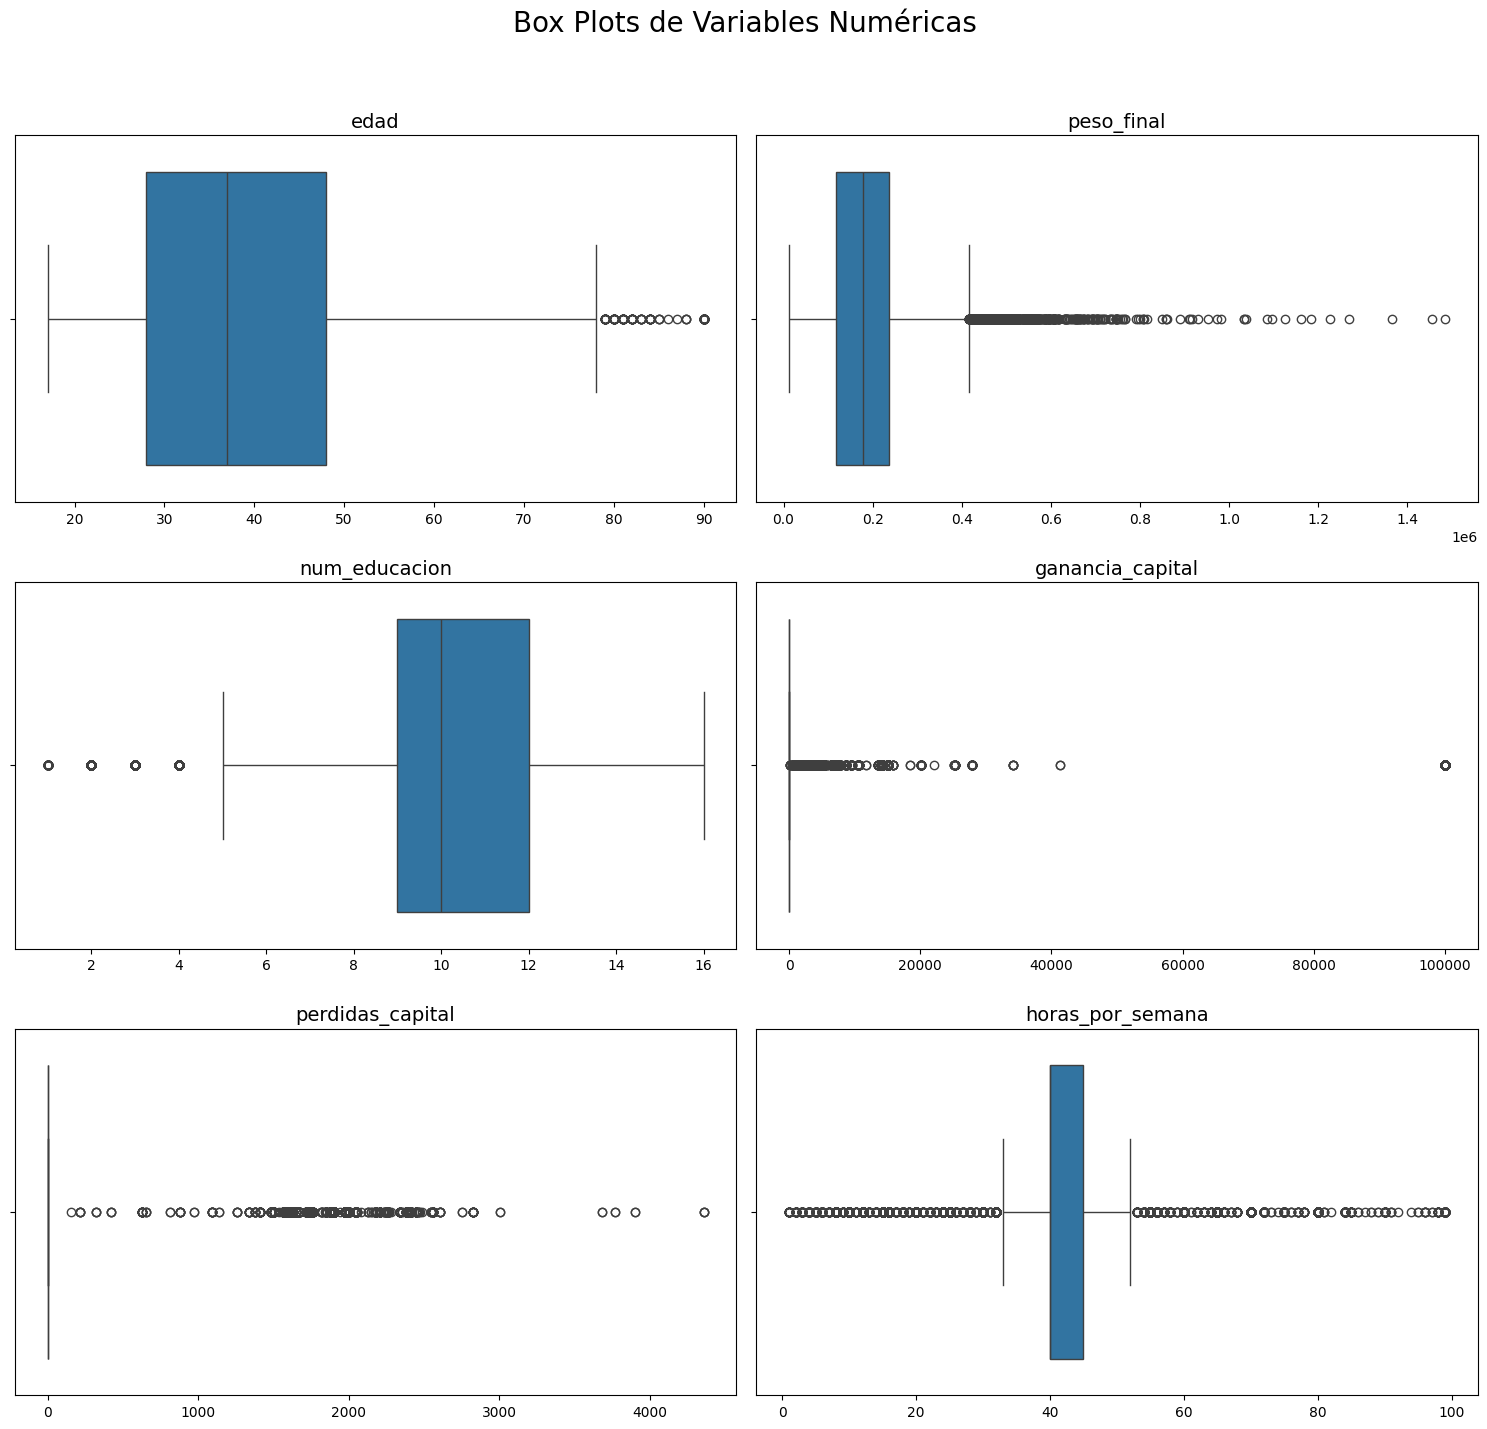

In [41]:

fig, axes = plt.subplots(nrows=len(columnas_numericas)//2, ncols=2, figsize=(15, 15))
fig.suptitle('Box Plots de Variables Numéricas', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=df_ingresos[col], ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Histogramas

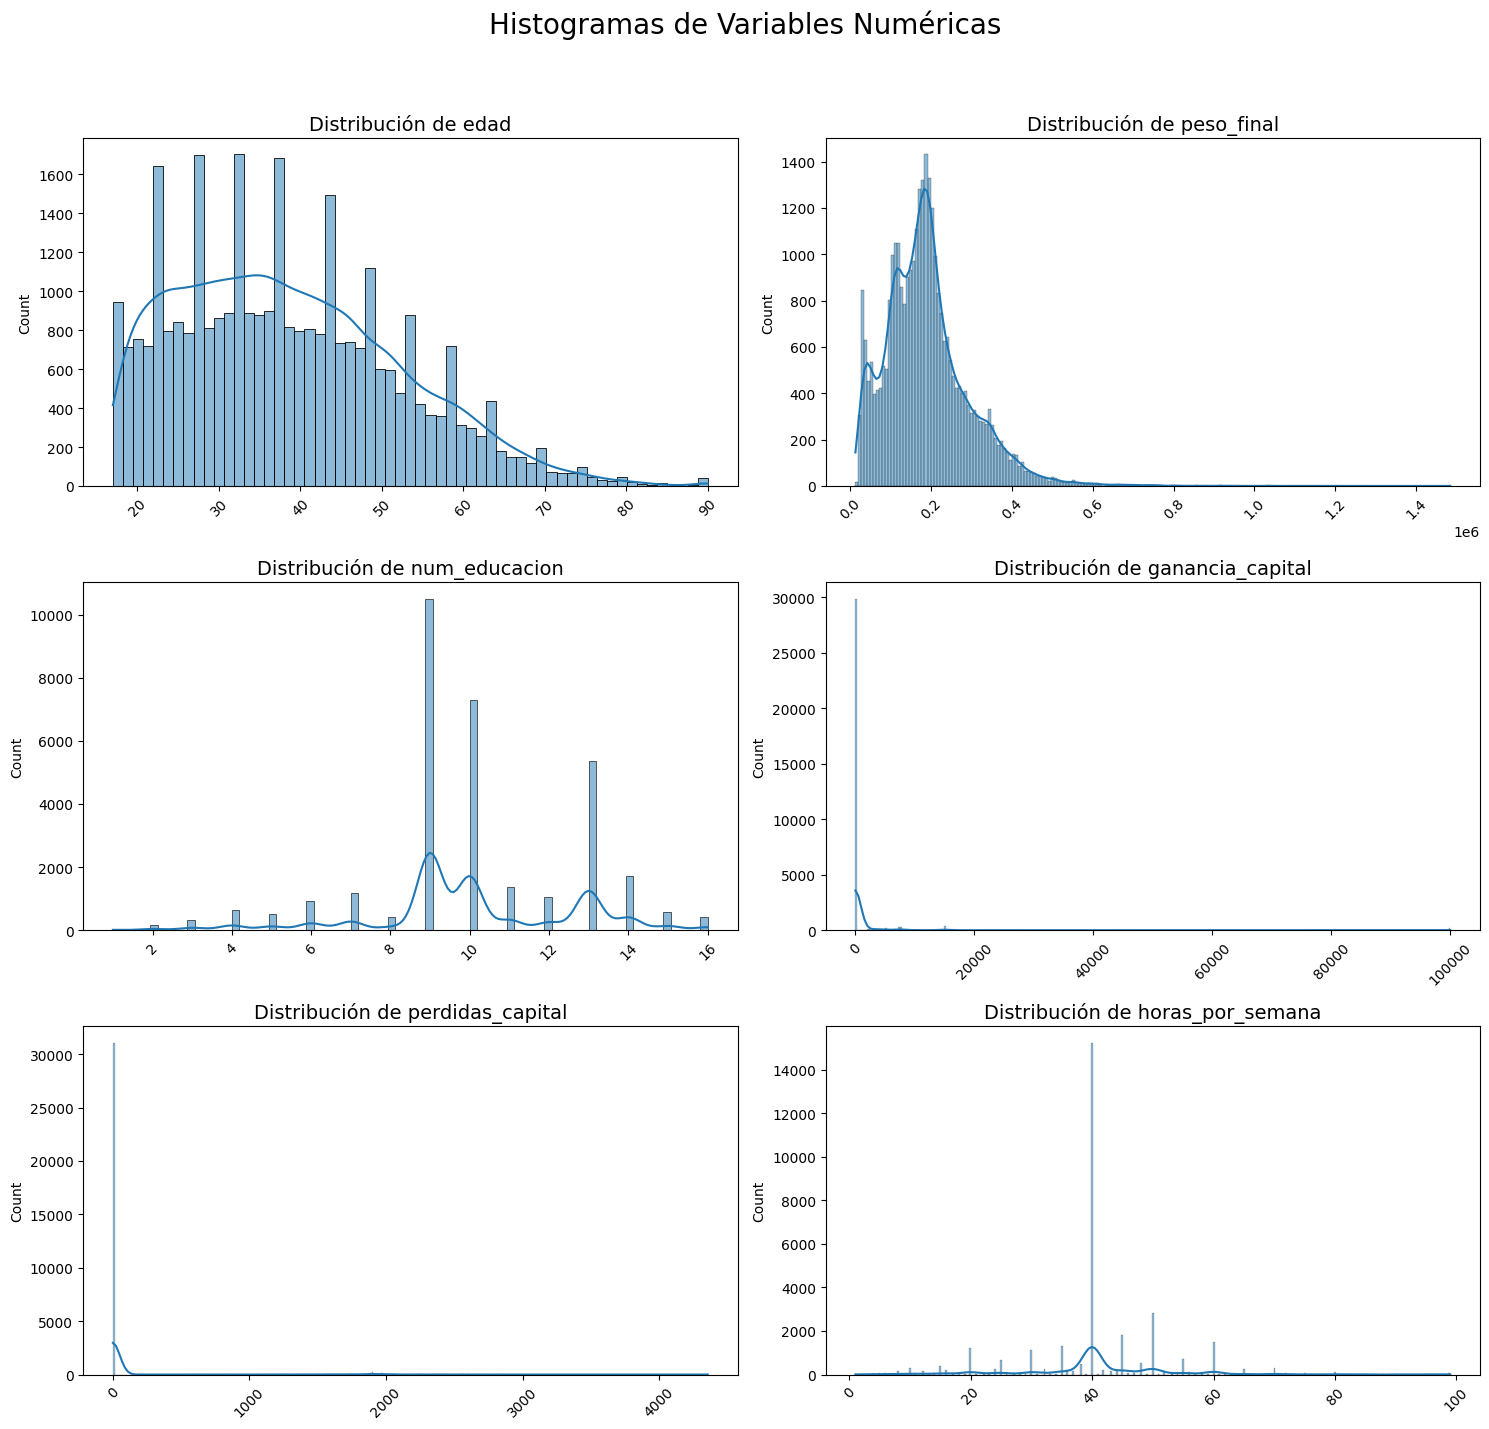

In [42]:
fig, axes = plt.subplots(nrows=len(columnas_numericas)//2, ncols=2, figsize=(15, 15))
fig.suptitle('Histogramas de Variables Numéricas', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.histplot(df_ingresos[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Analisis bivariado

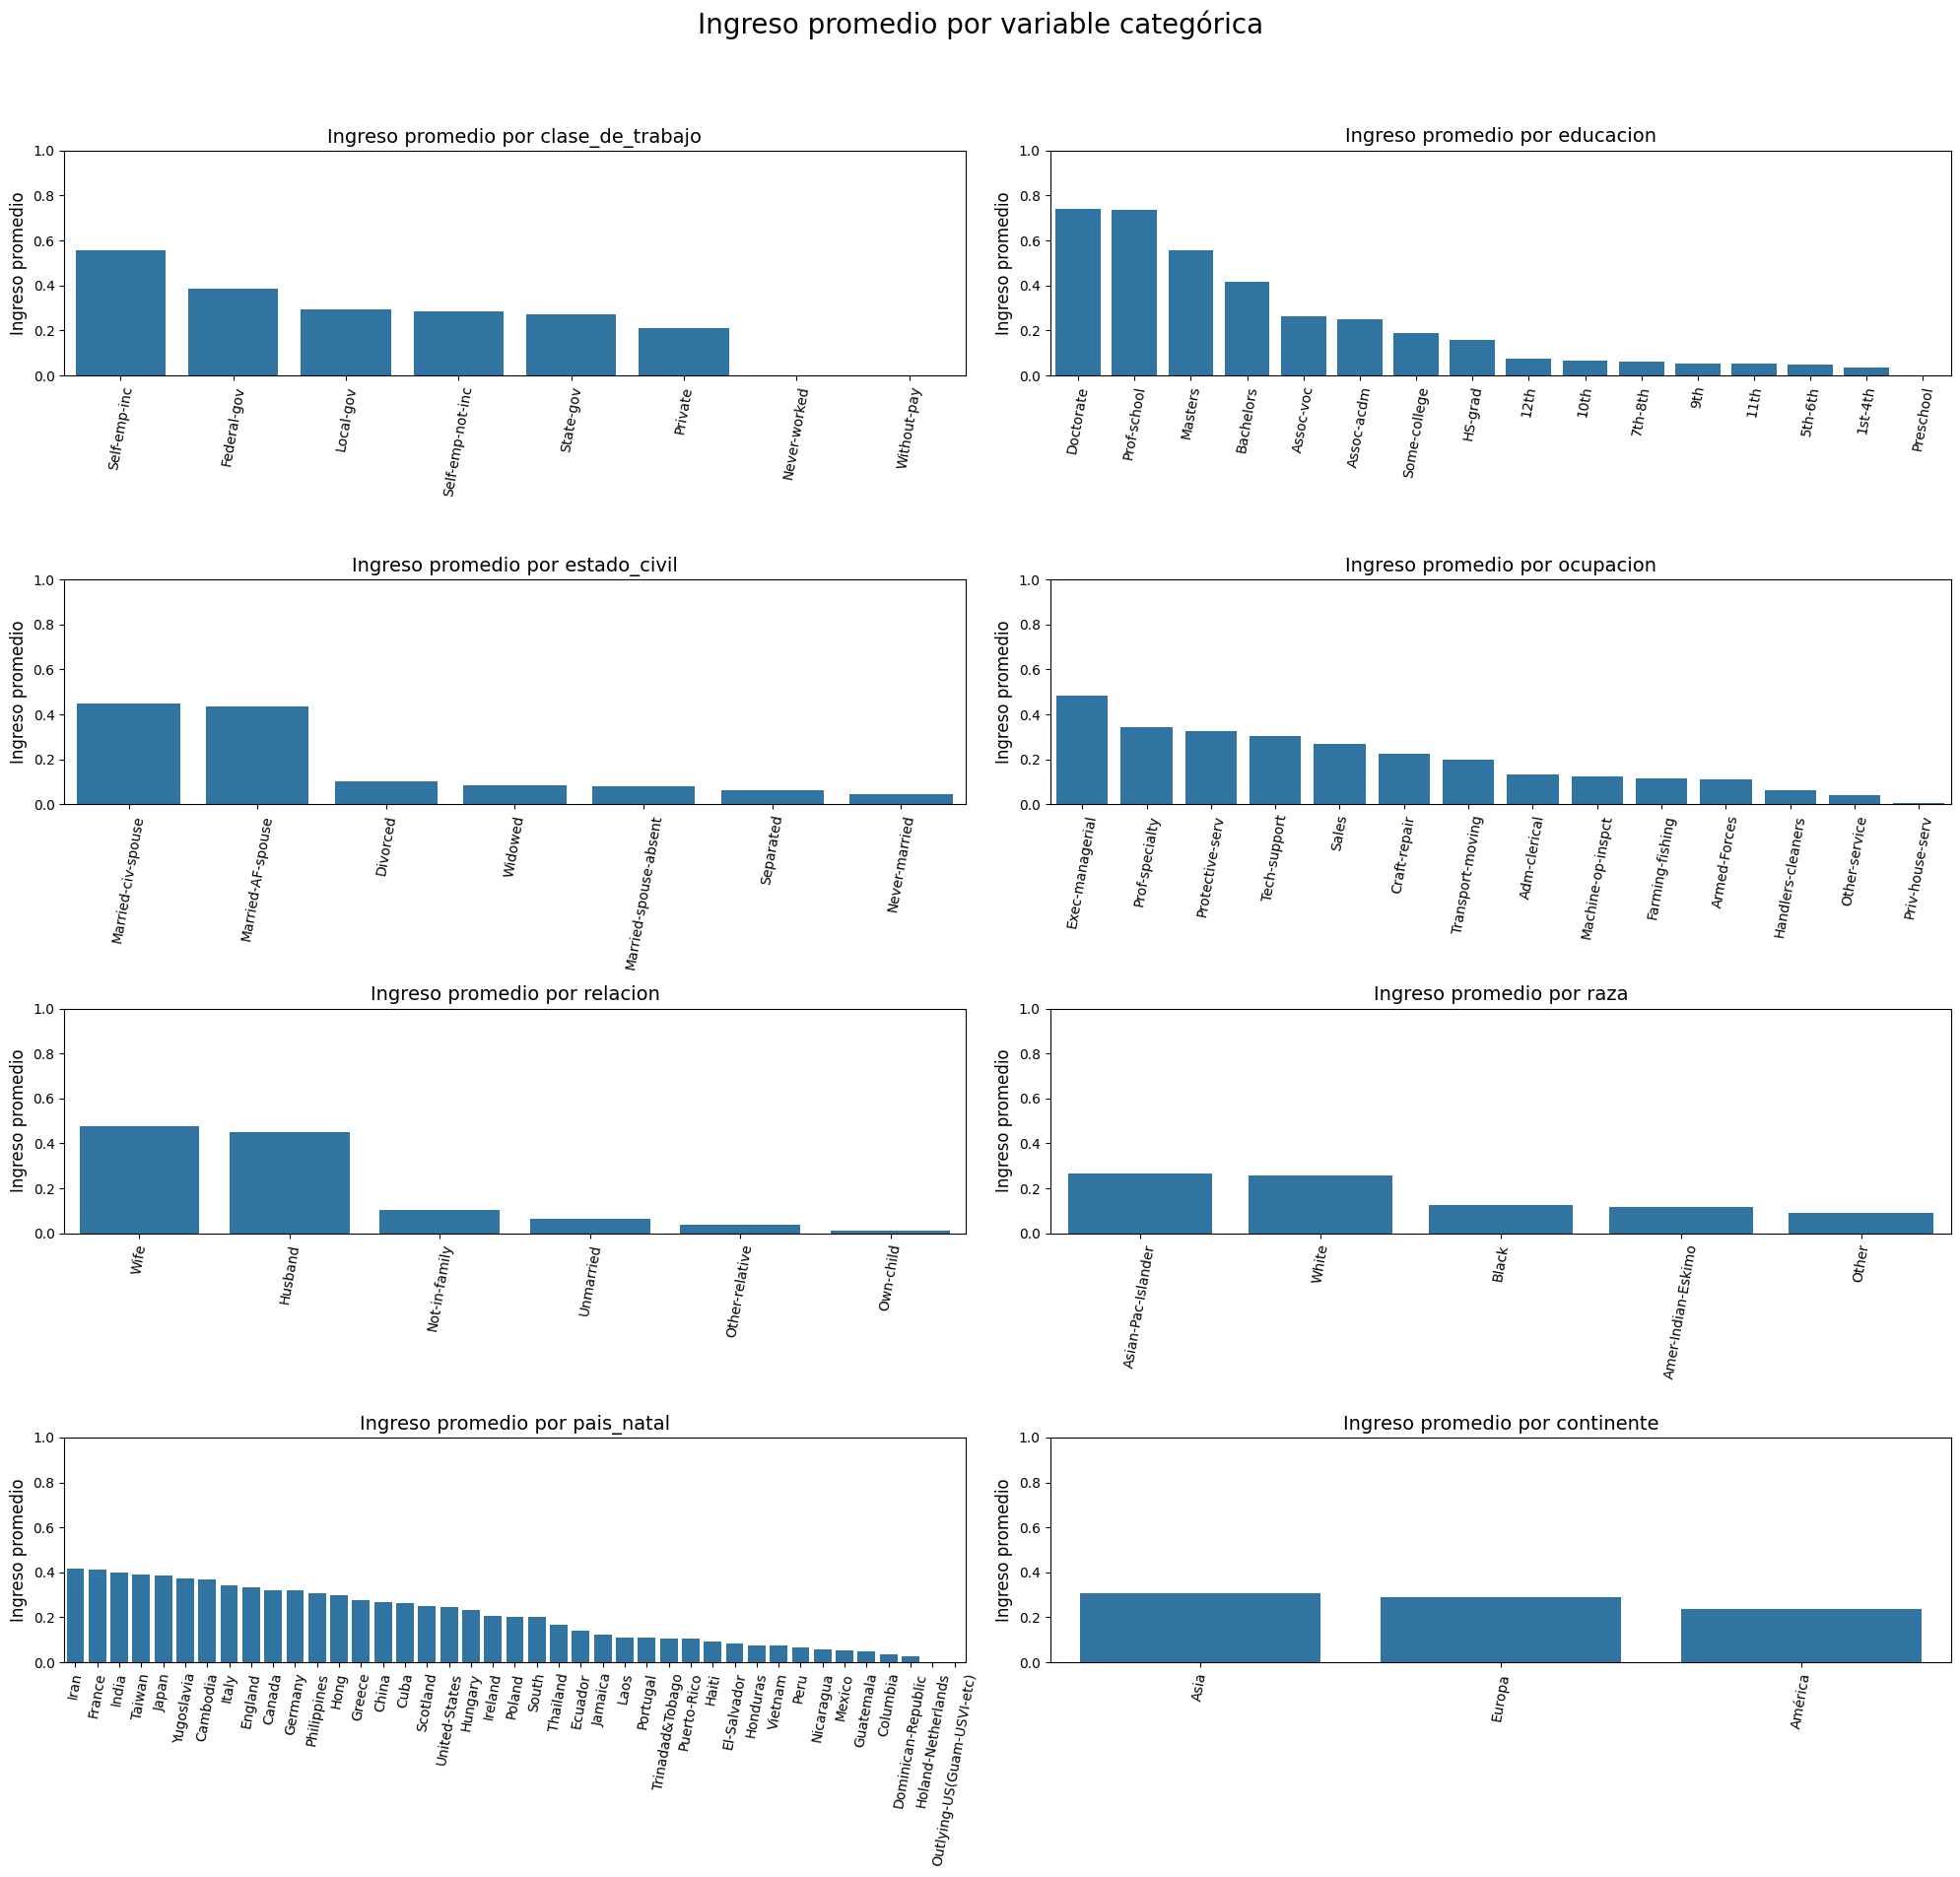

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig.suptitle('Ingreso promedio por variable categórica', fontsize=20)
axes = axes.flatten()

for i, col in enumerate(columnas_categoricas):
    if(col != 'ingreso'):
        promedio_ingreso = df_ingresos.groupby(col)
        promedio_ingreso = promedio_ingreso['ingreso'].mean().sort_values(ascending=False).reset_index()
        sns.barplot(x=col, y='ingreso', data=promedio_ingreso, ax=axes[i])
        axes[i].set_title(f'Ingreso promedio por {col}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Ingreso promedio', fontsize=12)
        axes[i].tick_params(axis='x', rotation=80)
        axes[i].set_ylim(0, 1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [44]:
df_ingresos.drop(columns=["pais_natal"], inplace=True)

## Analisis multivariado

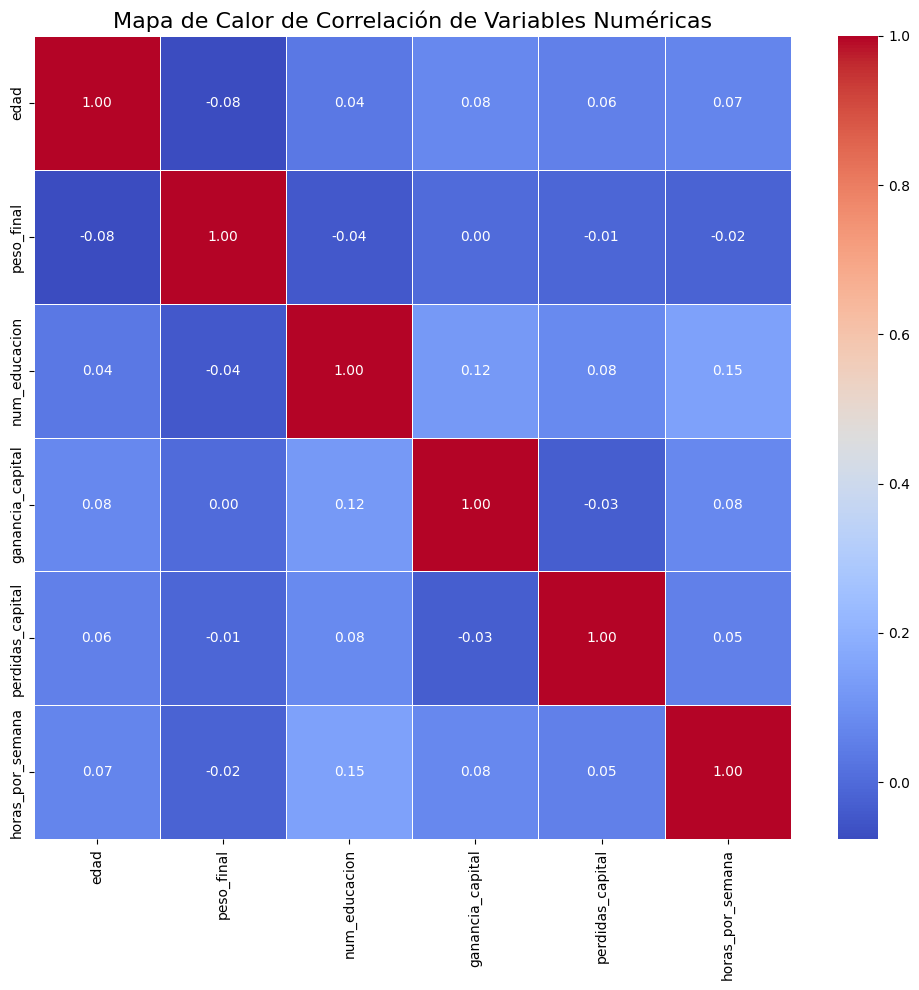

In [45]:
correlation_matrix = df_ingresos[columnas_numericas].corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

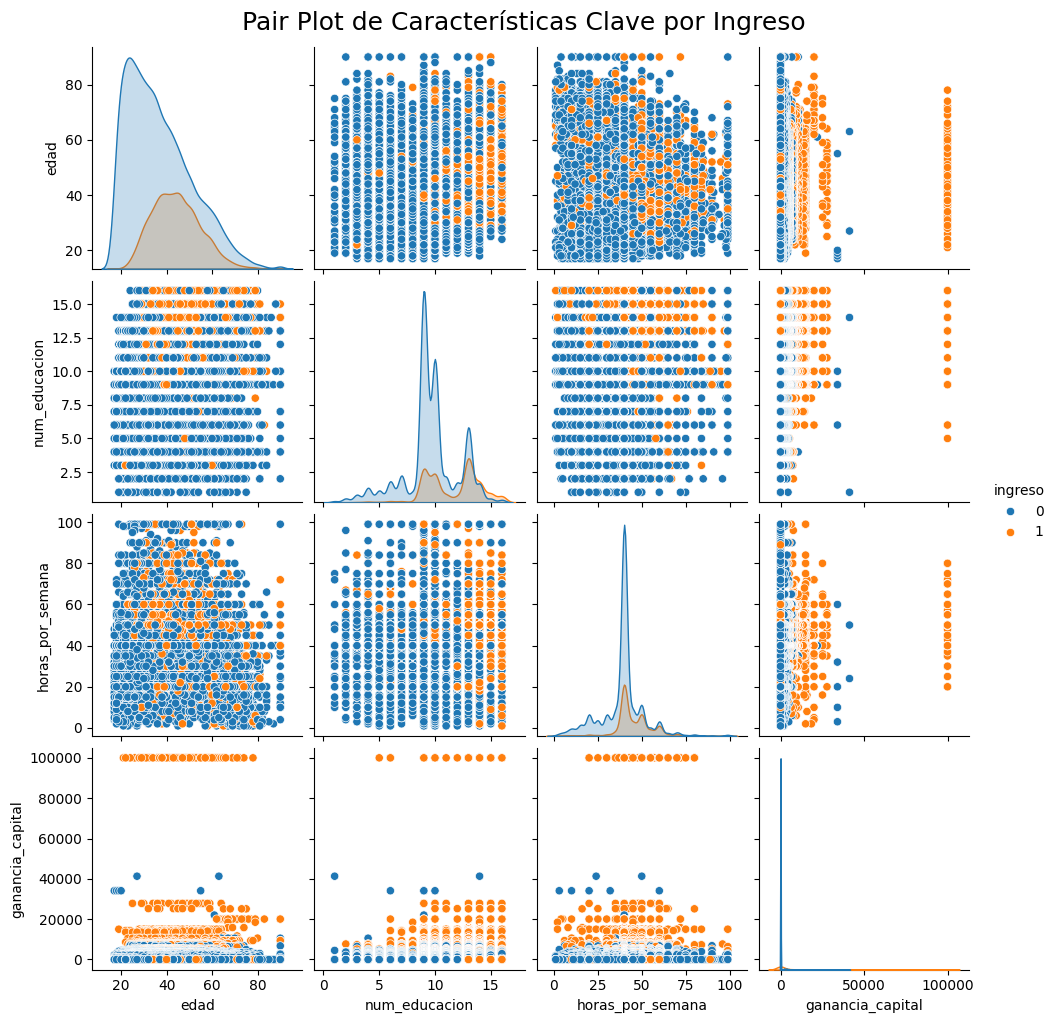

In [46]:
caracteristicas = ['edad', 'num_educacion', 'horas_por_semana', 'ganancia_capital', 'ingreso']
df_plot = df_ingresos[caracteristicas].copy()

sns.pairplot(df_plot, hue='ingreso', diag_kind='kde')
plt.suptitle('Pair Plot de Características Clave por Ingreso', y=1.02, fontsize=18)
plt.show()

## Construccion de hipotesis iniciales: 
Basado en el análisis exploratorio inicial, podemos formular las siguientes hipótesis:
1. **A mayor nivel educativo, mayor ingreso:** Las personas con más años de educación (`num_educacion`) y con títulos avanzados (ej. `Bachelors`, `Masters`, `Doctorate`) tienen una probabilidad significativamente mayor de ganar más de $50K.
2. **La experiencia laboral (edad) incrementa el ingreso:** Los ingresos tienden a aumentar con la edad, alcanzando un pico en la mediana edad (40-55 años). Por lo tanto, los grupos 'Adulto' y 'Mediana Edad' tendrán la mayor proporción de personas con ingresos altos.
3. **Las horas de trabajo afectan directamente el ingreso:** Existe una correlación positiva entre las `horas_por_semana` y la probabilidad de superar los $50K. Quienes trabajan más de 40 horas semanales tienen mayores ingresos.",
4. **Ciertas ocupaciones y estados civiles están asociados a mayores ingresos:** Las personas en roles profesionales o ejecutivos (`ocupacion` como `Exec-managerial`, `Prof-specialty`) y aquellas que están casadas (`estado_civil` como `Married-civ-spouse`) tienen una mayor probabilidad de ganar más de $50K.
5. **Existe una brecha de ingresos por género:** A pesar de controlar por otras variables como educación y horas de trabajo, se espera que los hombres (`sexo`) tengan una mayor proporción de ingresos altos en comparación con las mujeres."

## Visualizaciones clave

D:\Users\jsrnieto\AppData\Local\Temp\ipykernel_40516\3309486093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ingreso', data=df_ingresos, palette='viridis')


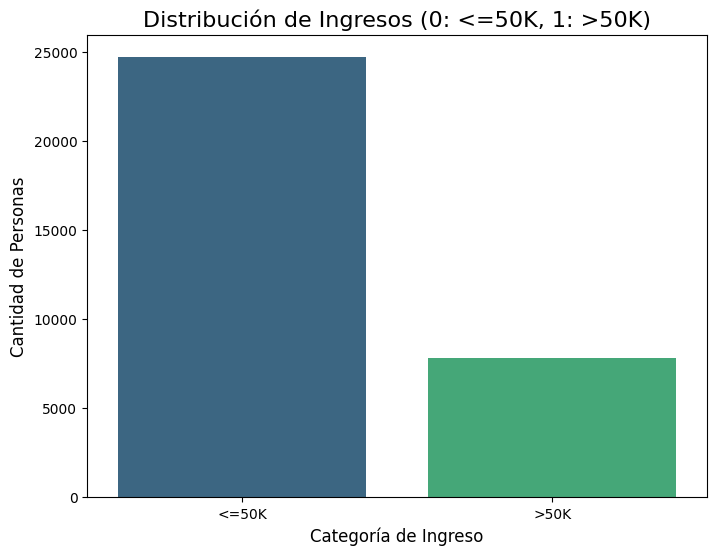

D:\Users\jsrnieto\AppData\Local\Temp\ipykernel_40516\3309486093.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_por_educacion.index, y=promedio_por_educacion.values, palette='plasma')


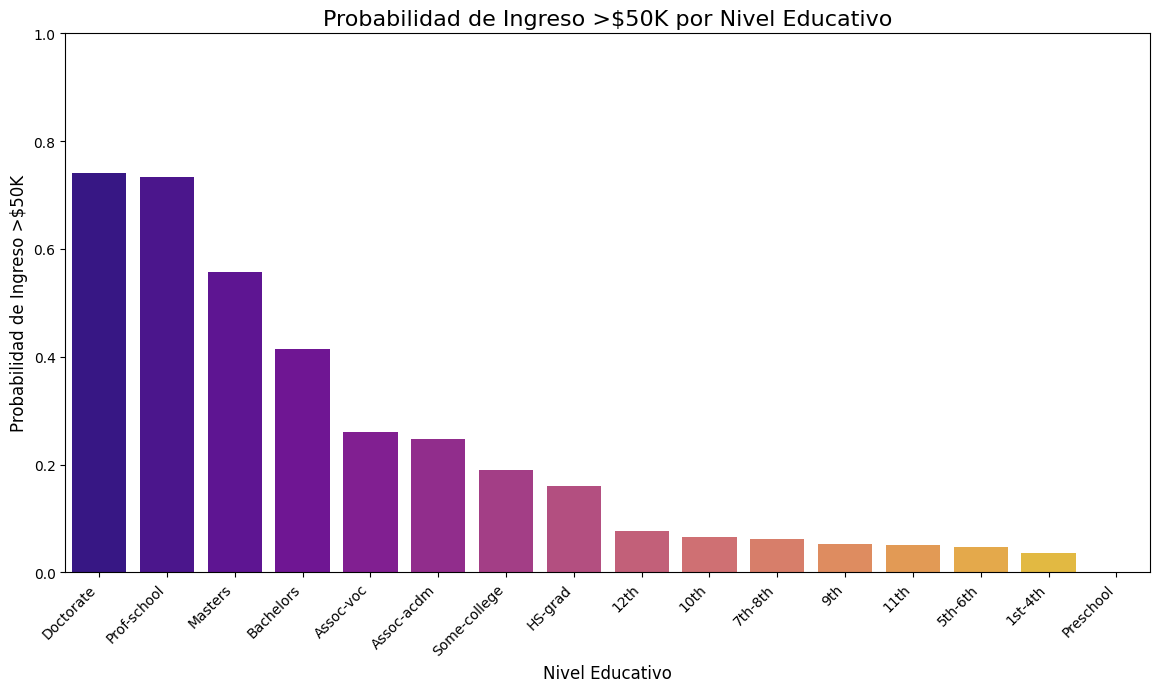

D:\Users\jsrnieto\AppData\Local\Temp\ipykernel_40516\3309486093.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ingreso', y='edad', data=df_ingresos, palette='muted')


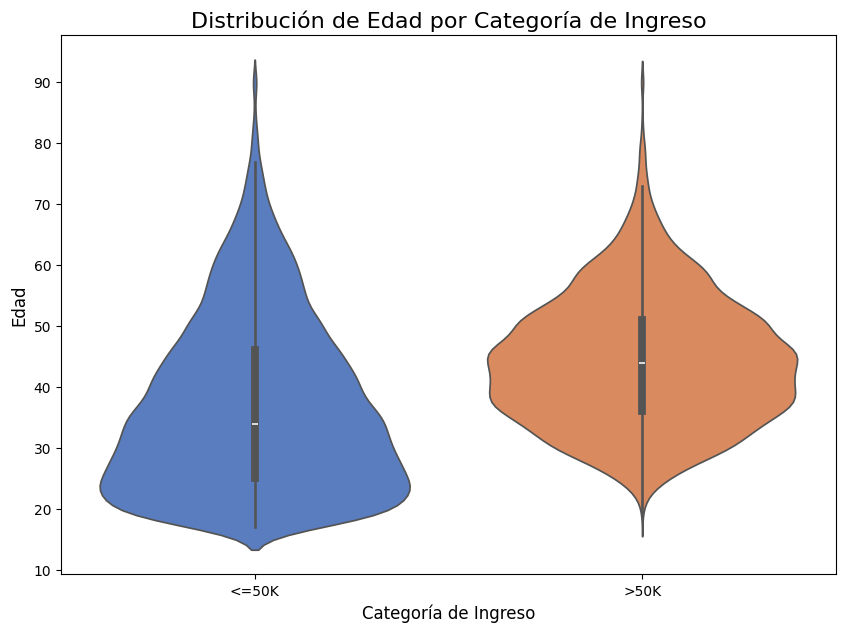

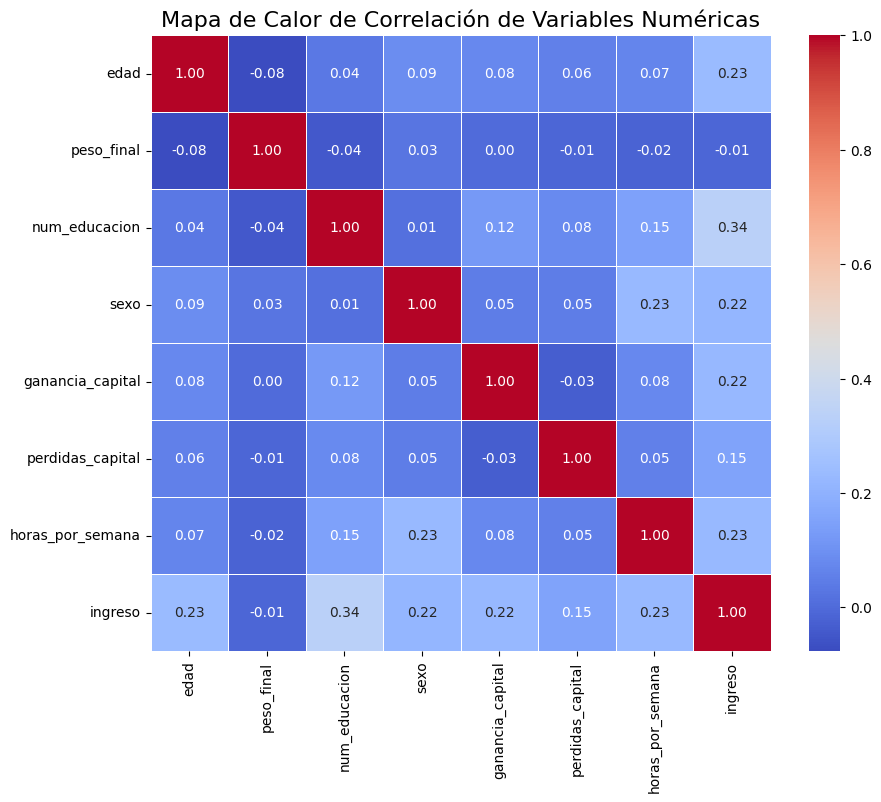

In [47]:
# 1. Distribución de la variable objetivo (Ingreso)
plt.figure(figsize=(8, 6))
sns.countplot(x='ingreso', data=df_ingresos, palette='viridis')
plt.title('Distribución de Ingresos (0: <=50K, 1: >50K)', fontsize=16)
plt.xlabel('Categoría de Ingreso', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

# 2. Ingreso promedio por Nivel Educativo (Gráfico de Barras)
plt.figure(figsize=(14, 7))
promedio_por_educacion = df_ingresos.groupby('educacion')['ingreso'].mean().sort_values(ascending=False)
sns.barplot(x=promedio_por_educacion.index, y=promedio_por_educacion.values, palette='plasma')
plt.title('Probabilidad de Ingreso >$50K por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Probabilidad de Ingreso >$50K', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

# 3. Distribución de Edad por Ingreso (Boxplot/Violinplot)
plt.figure(figsize=(10, 7))
sns.violinplot(x='ingreso', y='edad', data=df_ingresos, palette='muted')
plt.title('Distribución de Edad por Categoría de Ingreso', fontsize=16)
plt.xlabel('Categoría de Ingreso', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()

# 4. Mapa de Calor de Correlaciones
plt.figure(figsize=(10, 8))
# Seleccionamos solo las columnas numéricas para la correlación
columnas_numericas_corr = df_ingresos.select_dtypes(include=np.number).columns
correlation_matrix = df_ingresos[columnas_numericas_corr].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas', fontsize=16)
plt.show()


## Insights principales:

**Patrones Relevantes Encontrados:**
1. **La Educación es Clave:** El nivel educativo es uno de los predictores más fuertes del ingreso. Las personas con educación superior (Doctorado, Maestría, Escuela Profesional) tienen una probabilidad mucho mayor de ganar más de $50K.
2. **La Experiencia (Edad) y el Estado Civil Importan:** Los ingresos aumentan con la edad, alcanzando un pico en la mediana edad (40-55 años). Además, las personas casadas (`Married-civ-spouse`) tienen una probabilidad significativamente mayor de tener ingresos altos.
3. **Brecha de Género Persistente:** Existe una clara brecha de ingresos entre hombres y mujeres. Los hombres tienen una proporción considerablemente mayor de ingresos altos, incluso controlando por otras variables.
4. **La Ocupación Define el Ingreso:** Ciertas profesiones, como los roles ejecutivos-directivos y las especialidades profesionales, están fuertemente asociadas con ingresos superiores a $50K.
5. **Correlación entre Horas de Trabajo e Ingreso:** A más horas trabajadas por semana, mayor es la probabilidad de tener un ingreso alto, aunque la correlación no es extremadamente fuerte, sugiere que el esfuerzo laboral es un factor relevante.

**Problemas de Calidad Detectados:**
*   **Valores Faltantes:** Se encontraron valores faltantes marcados como `'?'` en las columnas `clase_de_trabajo`, `ocupacion` y `pais_natal`. La estrategia actual fue imputación de moda.
*   **Outliers Extremos:** Las variables `ganancia_capital` y `perdidas_capital` tienen una gran cantidad de valores en cero y algunos valores atípicos muy altos. Esto puede sesgar el análisis y los modelos si no se trata adecuadamente.

**Posibles Líneas de Análisis Futuro:**
*   **Manejo de Outliers:** Aplicar transformaciones a las variables de ganancia y pérdida de capital para reducir el efecto de los valores atípicos.

### Guardar dataset

In [48]:
df_ingresos.to_csv('./income/datos_limpios.csv', index=False)